In [ ]:
# This notebook compares the psychometric performance of mice on the cloud of tones task,
# according to muscimol injections in the tail of the striatum and dorsomedial striatum

In [ ]:
# run this on Colab
!rm -rf APE_paper/
!git clone https://github.com/HernandoMV/APE_paper.git
%pip install git+file:///content/APE_paper
%cd APE_paper/doc/figures_notebooks

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pylab as plt
from APE_paper.plot import make_figures
from APE_paper.utils import custom_functions as cuf
from IPython.display import clear_output

In [2]:
# load the dataset
dataset_path = '../../data/Muscimol-injections_dataframe.csv'
mus_df = pd.read_csv(dataset_path, index_col=0)

KeyError: 'Protocol'

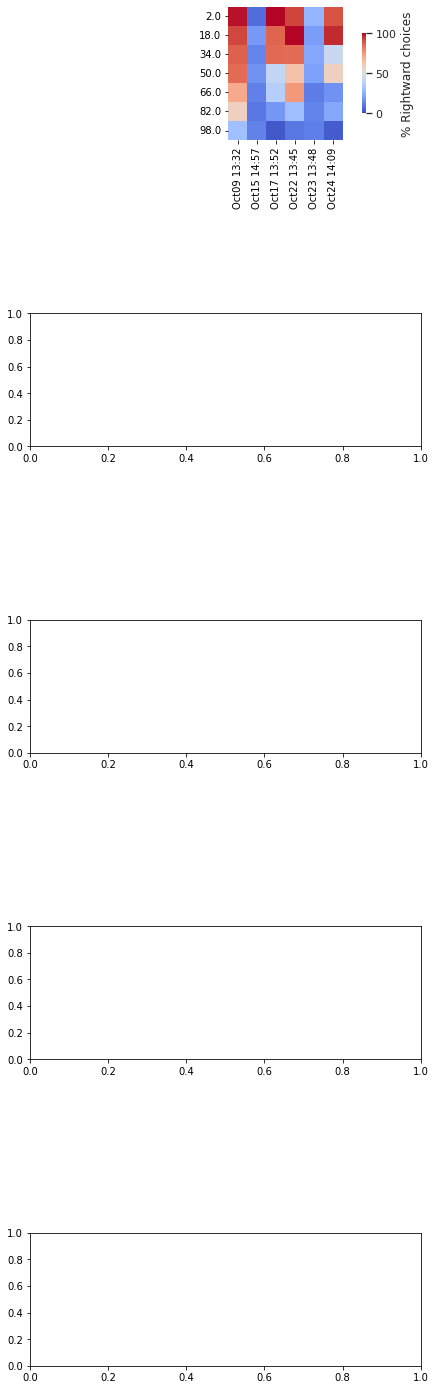

In [3]:
# see a summary of the dataset
fig = make_figures.make_figure_muscimol_sessions_overview(mus_df)
plt.show(fig)
# uncomment here to save the plot
# data_directory = ''
# plt.savefig(data_directory + 'Muscimol-sessions-per-mouse.pdf',
#             transparent=True, bbox_inches='tight')

In [4]:
# Analyse the different conditions
muscimol_conditions = ['StrTail-bilat-Control', 'StrTail-bilat', 'DMS-bilat']
text_for_figure = ['Saline (str tail)', 'Muscimol (str tail)', 'Muscimol (DMS)']
PP_array = []
for muscond in muscimol_conditions:
    # process the psuchometric performance
    predictDif, PsyPer, fakePredictions, predictPer, EB = \
    cuf.PP_ProcessExperiment(mus_df[mus_df['Muscimol'] == muscond], 500, error_bars='SessionTime')
    # save to array
    PP_array.append([predictDif, PsyPer, fakePredictions, predictPer, EB])

clear_output()

##### The following cell creates **Figures 1 C** from the paper

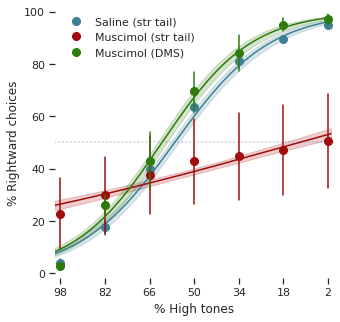

In [5]:
# prepare colors
colorlist = [(0.24715576, 0.49918708, 0.57655991),
             (160/255, 11/255 , 11/255),
             (46/255, 122/255 , 11/255)]

fig = make_figures.make_figure_muscimol_psychometric(PP_array, text_for_figure, colorlist)
plt.show(fig)
# uncomment here to save the plot
# data_directory = ''
# plt.savefig(data_directory + 'Figure1C.pdf',
#             transparent=True, bbox_inches='tight')